In [1]:
import numpy as np
import pandas as pd
import os

In [12]:
params = ["1.500000", "0.100000", "0.500000", "0"]
orderings = ['morton']
cs_set = [150]
bs_set = [1, 2, 3]
locs_set = np.int32(np.arange(10, 18) * 1e4)
filename_template = 'locs_{}_cs_150_bs_{}_seed_0_kernel_{}:{}:{}_{}'
file_folder = './log/150cs-time/'
fig_folder = './fig/150cs-time/'

if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

time_all = np.zeros([1, 1, len(locs_set), len(bs_set)])

for i_locs, locs in enumerate(locs_set):
    for i_bs, bs in enumerate(bs_set):
        filename = filename_template.format(locs, bs, params[0], params[1], params[2], orderings[0])
        file_path = os.path.join(file_folder, filename)
        try:
            with open(file_path, 'r') as file:
                # Use a loop to skip the first line
                file.readline()  # Read and discard the first line
                # Now, read the second line
                second_line = file.readline()
                # print(dense_llh[i], float(second_line.split(",")[4]))
                llh = float(second_line.split(",")[5])
                time_all[0, 0, i_locs, i_bs] = llh
        except FileNotFoundError:
            print(f"File {filename} not found")

time_all.shape

(1, 1, 8, 3)

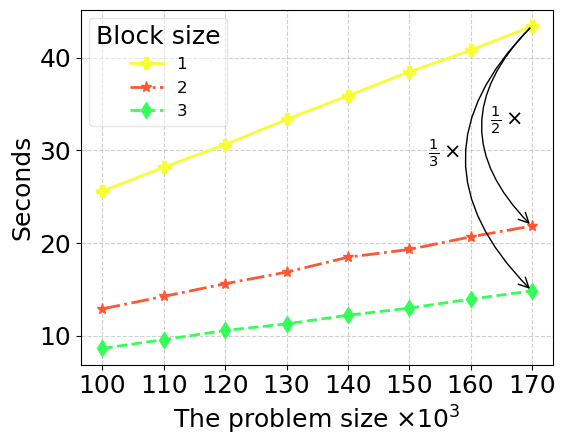

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 18  # You can set any numeric value here

fig_dir = './fig'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

markers = ['P', '*', 'd', 'X', '8']
colors = [
    "#3357FF",  # Royal blue
    "#33FFF6",  # Cyan
    "#8B4513",  # Saddle brown
    "#FF33F6",  # Magenta
    "#F6FF33",  # Yellow
    "#FF5733",  # Reddish-orange
    "#33FF57",  # Bright green
    "#FF69B4",   # Hot pink
]
linestyles = ['-', '-.', '--']

ymax = np.max(time_all)
ymin = np.min(time_all)

def plot_kl(cs_set, bs_set, yy, info):
    fig, ax = plt.subplots(figsize=(6, 4.8))
    # fig, ax = plt.subplots(figsize=(6, 6))
    for i_bs, bs in enumerate(bs_set):
        # for i_bs, bs in enumerate(bs_set):
        ax.plot(locs_set/1000, yy[0, 0, :, i_bs], 
                label=str(bs), 
                linewidth=2, 
                color=colors[i_bs + 4], 
                linestyle=linestyles[i_bs], 
                alpha=1,
                marker=markers[i_bs], markersize=8
                )
    # Adding a curved arrow (invisible, just to create the curved line)
    class_vecchia_x, class_vecchia_y = locs_set[-1]/1000, yy[0, 0, -1, 0]
    bs2_vecchia_x, bs2_vecchia_y = locs_set[-1]/1000, yy[0, 0, -1, 1]
    bs3_vecchia_x, bs3_vecchia_y = locs_set[-1]/1000, yy[0, 0, -1, 2]
    
    ## bs = 2 
    ax.annotate("", #
            xy=(bs2_vecchia_x, bs2_vecchia_y), xycoords='data',
            xytext=(class_vecchia_x, class_vecchia_y), textcoords='data',
            arrowprops=dict(arrowstyle="->", color="black", connectionstyle="arc3,rad=.5")) 
            #arrowstyle="->,head_length=1,head_width=1"
    # # Adding text along the curve
    ax.text((class_vecchia_x + bs2_vecchia_x) / 2 * 0.96, 
            (class_vecchia_y + bs2_vecchia_y) / 2,
            r"$\frac{1}{2}\times$", fontsize=15)

    ## bs = 3
    ax.annotate("", #
            xy=(bs3_vecchia_x, bs3_vecchia_y), xycoords='data',
            xytext=(class_vecchia_x, class_vecchia_y), textcoords='data',
            arrowprops=dict(arrowstyle="->", color="black", connectionstyle="arc3,rad=.5")) 
            #arrowstyle="->,head_length=1,head_width=1"
    # # Adding text along the curve
    ax.text((class_vecchia_x + bs3_vecchia_x) / 2 * 0.9, 
            (class_vecchia_y + bs3_vecchia_y) / 2,
            r"$\frac{1}{3}\times$", fontsize=15)
    
    

    ax.set_xlabel(r'The problem size $\times 10^3$')
    ax.set_ylabel('Seconds')
    # ax.set_ylim(ymin*0.6, ymax*5)
    # ax.set_yscale('log')
    # if (info[1] == '0.114318'):
    # Adding enhanced legend, title, and labels
    legend = ax.legend(ncol = 1, fontsize=12, title="Block size")
                        # loc='lower center', bbox_to_anchor=(0.5, -0.5) 
                        # title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
    legend.get_frame().set_alpha(0.5)  # 50% transparency
    # ax.legend(fontsize=12, shadow=True, frameon=True, ) #, title = 'Block size'
    ax.grid(True, linestyle='--', alpha=0.6)
    # ax.axhline(y=1e1, color='red', linestyle='--', linewidth=0.8)
    _list_xtick = [100, 110, 120, 130, 140, 150, 160, 170]
    plt.xticks(_list_xtick, _list_xtick)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f'20k-fixedcs-time.pdf'))
    # plt.show()

plot_kl(cs_set, bs_set, time_all, params[0])

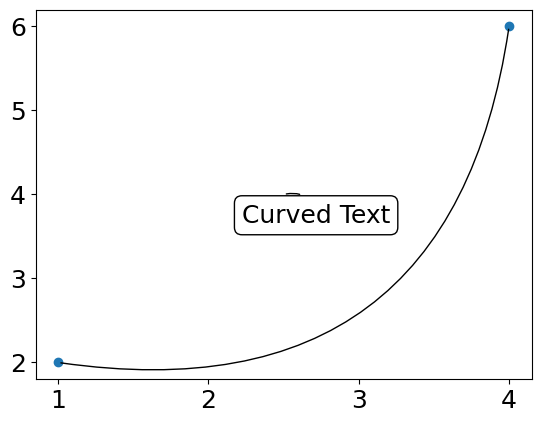

In [22]:
import matplotlib.pyplot as plt

# Example data points
x_start, y_start = 1, 2
x_end, y_end = 4, 6

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting points
ax.scatter([x_start, x_end], [y_start, y_end])


# Show plot
plt.show()
